# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Gilang Ramadhan
- **Email:** gilangramadhanmuhammad6@gmail.com
- **ID Dicoding:** gilskuy2003

## Menentukan Pertanyaan Bisnis

- Bagaimana tren jumlah peminjaman sepeda dalam beberapa bulan terakhir?
- Pada hari apa terjadi peminjaman sepeda yang melonjak dan peminjaman sepeda paling sedikit?
- Apakah pelanggan casual lebih cenderung menyewa sepeda pada musim tertentu dibanding pelanggan registered?
- Apakah ada batasan kecepatan angin tertentu di mana peminjaman sepeda mulai berkurang drastis?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

## Data Wrangling

### Gathering Data

In [3]:
uploaded = files.upload()

Saving day.csv to day.csv
Saving hour.csv to hour.csv


In [4]:
bikes_per_hour_df = pd.read_csv('hour.csv')
bikes_per_hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Tabel Hour ini memuat berbagai data seperti tanggal, season, tahun, bulan, jam penyewaan, hari libur, hari biasa, hari kerja, suhu, kelembapan, kecepatan angin, jumlah pengguna, total penyewaan.

In [5]:
bikes_per_day_df = pd.read_csv('day.csv')
bikes_per_day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Tabel Day ini memuat data seperti pada tabel Hour namun yang membedakan disini tidak terdapat column jam penyewaan

### Assessing Data

In [6]:
bikes_per_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
bikes_per_hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [8]:
print("Jumlah duplikasi: ", bikes_per_hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
bikes_per_hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Kesalahan didapatkan pada saat pengecekan tipe data dari dteday pada hasil pengecekan tipe data dteday disini mengembalikan object sedangkan yang diharapkan adalah date&time
- Saat pengecekan missing values dan duplikasi tidak terdapat data yang terindikasi kosong ataupun duplikat pada tabel hour

In [10]:
bikes_per_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [11]:
bikes_per_hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [12]:
print("Jumlah duplikasi: ", bikes_per_hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [13]:
bikes_per_hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Pengecekan tipe data menunjukkan keanehan tipe data pada dteday ini adalah object sedangkan yang diharapkan adalah date&time
- Untuk pengecekan pada missing values serta duplikasi data tidak menunjukkan adanya nilai yang kosong atau pun data yang duplikat

### Cleaning Data

In [14]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  bikes_per_hour_df[column] = pd.to_datetime(bikes_per_hour_df[column])

In [15]:
bikes_per_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [16]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  bikes_per_day_df[column] = pd.to_datetime(bikes_per_day_df[column])

In [17]:
bikes_per_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Setelah mengetahui adanya ketidaksesuain tipe data pada kolom dteday pada tabel hour dan day yang sebelumnya adalah object kini telah diubah menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore ...

**Explore Data Frame Day**

In [18]:
bikes_per_day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [19]:
bikes_per_day_df['year_month'] = bikes_per_day_df['dteday'].dt.to_period('M')
monthly_trend = bikes_per_day_df.groupby('year_month')['cnt'].sum()
print(monthly_trend)

year_month
2011-01     38189
2011-02     48215
2011-03     64045
2011-04     94870
2011-05    135821
2011-06    143512
2011-07    141341
2011-08    136691
2011-09    127418
2011-10    123511
2011-11    102167
2011-12     87323
2012-01     96744
2012-02    103137
2012-03    164875
2012-04    174224
2012-05    195865
2012-06    202830
2012-07    203607
2012-08    214503
2012-09    218573
2012-10    198841
2012-11    152664
2012-12    123713
Freq: M, Name: cnt, dtype: int64


**Insight:**
- Pada data hasil explorasi diatas awal mula terjadi peminjaman sepeda ini berasal pada bulan Mei 2011
- Dan penurunan sempat terjadi pada bulan Desember 2011

In [20]:
bikes_per_day_df.groupby(by='weekday').agg({
    "casual": ["sum"],
    "registered": ["sum"],
    "cnt": ["sum"]
})

,casual,registered,cnt
,sum,sum,sum
weekday,,,
0,140521,303506,444027
1,70784,384719,455503
2,57843,411266,469109
3,57319,415729,473048
4,61460,423935,485395
5,78238,409552,487790
6,153852,323955,477807


**Insight:**
- Berdasarkan hasil analisis diatas peminjaman sepeda melonjak pada hari menuju weekday dimana pengguna lebih sering meminjam sepeda

In [21]:
seasonal_usage = bikes_per_hour_df.groupby("season")[["casual", "registered"]].sum()

seasonal_usage["total"] = seasonal_usage["casual"] + seasonal_usage["registered"]
seasonal_usage = seasonal_usage.sort_values(by="total", ascending=False)

print(seasonal_usage)

        casual  registered    total
season                             
3       226091      835038  1061129
2       203522      715067   918589
4       129782      711831   841613
1        60622      410726   471348


**Insight:**
- Pada hasil data explorasi ini dapat dilihat pengguna casual dan registered banyak melakukan peminjaman pada musim gugur.
- Pengguna registered lebih stabil pada musim musim lainnya dibanding dengan pengguna casual.
- Pengguna casual cenderung banyak melakukan peminjaman pada musim gugur dan panas


**Explore Data Frame Hour**

In [22]:
bikes_per_hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [23]:
hour_usage = bikes_per_hour_df.groupby(by="hr")["cnt"].sum()

print(hour_usage)

hr
0      39130
1      24164
2      16352
3       8174
4       4428
5      14261
6      55132
7     154171
8     261001
9     159438
10    126257
11    151320
12    184414
13    184919
14    175652
15    183149
16    227748
17    336860
18    309772
19    226789
20    164550
21    125445
22     95612
23     63941
Name: cnt, dtype: int64


**Insight**:
- Berdasarkan hasil dari analisis diatas peminjaman sepeda lebih banyak dilakukan pada berangkat kerja atau pun pulang kerja menunjukkan bahwa jam produktif lebih di ramai customer

**Explore All Data Frame**

In [24]:
all_df = pd.merge(
    left=bikes_per_hour_df,
    right=bikes_per_day_df,
    how="right",
    left_on="instant",
    right_on="instant"
)
all_df.head()

,instant,dteday_x,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y,year_month
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2011-01
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2011-01
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2011-01
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,2011-01
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2011-01


**Notes**:
- Untuk kolom dengan akhiran _x itu menandakan bahwa kolom tersebut berasal dari bikes_per_hour_df
- Sedangkan kolom dengan akhiran _y itu menandakan bahwa kolom tersebut berasal dari bikes_per_day_df

In [25]:
wind_avg = all_df.groupby('windspeed_y', as_index=False)['cnt_y'].sum()
cnt_min = wind_avg.sort_values(by="cnt_y", ascending=True)
cnt_max = wind_avg.sort_values(by="cnt_y", ascending=False)
print(cnt_min.head(5))
print(cnt_max.head(5))

     windspeed_y  cnt_y
629     0.358200     22
96      0.113837    431
598     0.316546    441
575     0.293850    506
614     0.343287    605
     windspeed_y  cnt_y
263     0.166667  19299
81      0.106350  16872
166     0.136817  16014
87      0.110700  15431
268     0.167912  14883


**Insight**:
- Berdasarkan hasil analisis diatas peminjaman sepeda menurun drastis pada kecepatan angin sekitar 0.35 yang bisa dianggap tinggi dan lumayan untuk berkendara sepeda.
- Peminjaman lebih sering dilakukan pada kecepatan angin yang rendah dan aman untuk berkendara sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana tren jumlah peminjaman sepeda dalam beberapa bulan terakhir?


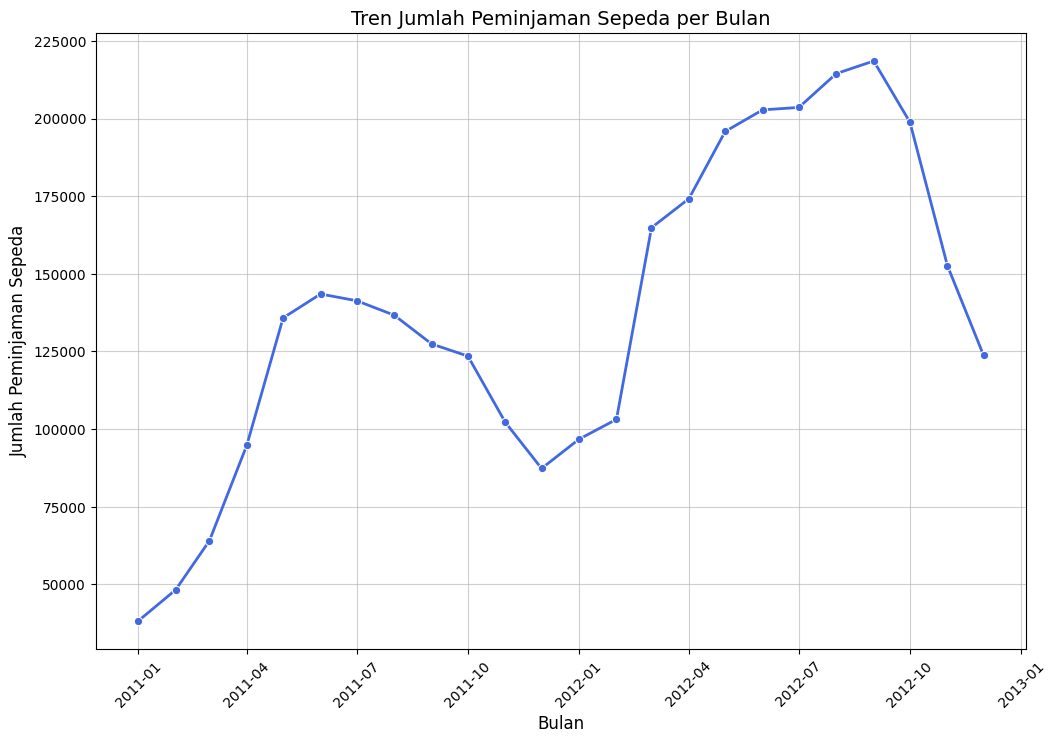

In [26]:
monthly_trend_df = all_df.groupby('year_month')['cnt_y'].sum()
monthly_trend_df.index = monthly_trend_df.index.to_timestamp()

plt.figure(figsize=(12, 8))
sns.lineplot(x=monthly_trend_df.index, y=monthly_trend_df.values, marker="o", linewidth=2, color="royalblue")
plt.title("Tren Jumlah Peminjaman Sepeda per Bulan", fontsize=14)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Jumlah Peminjaman Sepeda", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.6)
plt.show()

**Insight:**
- Berdasarkan data pada Linechart diatas dapat dilihat bahwa tren peminjaman selalu meningkat pada pertengahan bulan menuju pada akhir bulan.
- Pada 2011 tren peminjaman meningkat dari awal April sampai dengan Juli 2011.
- Sedangkan pada 2012 tren meningkat samanya seperti 2011 dari bulan April hingga dengan September tren ini terus meningkat.
- Bisa dikatakan untuk pengguna lebih sering melakukan peminjaman pada pertengahan tahun menuju pada akhir tahun pada setiap tahunnya dari 2011 dan 2012

### Pertanyaan 2:
Pada hari apa terjadi peminjaman sepeda yang melonjak dan peminjaman sepeda paling sedikit?

<ipython-input-45-d80d805ffd1b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


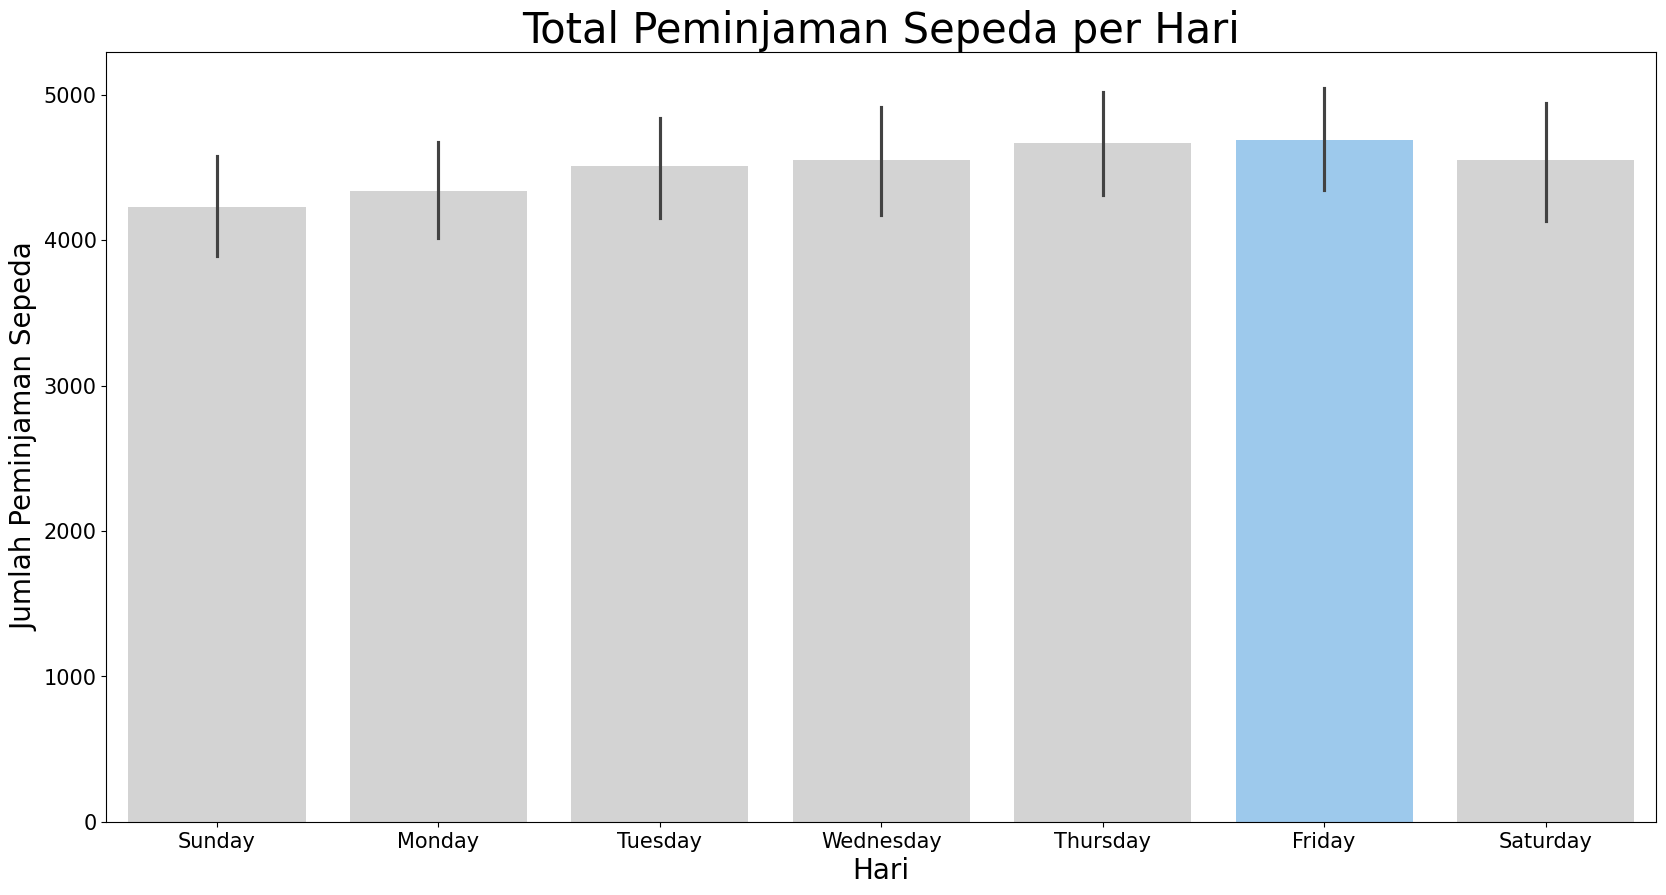

In [45]:
day_labels = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

fig, ax = plt.subplots(figsize=(20, 10))
colors = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#90CAF9", "#D3D3D3"]
sns.barplot(
    x="weekday",
    y="cnt",
    data=bikes_per_day_df.sort_values(by="cnt", ascending=True),
    palette=colors,
    ax=ax
)
ax.set_title("Total Peminjaman Sepeda per Hari", loc="center", fontsize=30)
ax.set_ylabel("Jumlah Peminjaman Sepeda", fontsize=20)
ax.set_xlabel("Hari", fontsize=20)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.set_xticks(range(7))
ax.set_xticklabels(day_labels)
plt.show()

**Insight:**
- Berdasarkan dari visualisasi data dalam bentuk barchart terlihat pengguna lebih sering melakukan peminjaman sepeda pada hari menuju akhir pekan seperti kamis, jumat dan sabtu
- Dan peminjaman paling sedikit terjadi pada hari minggu atau akhir pekan dimana data menunjukkan sedikit penurunan pada hari minggu

### Pertanyaan 3:
Apakah pelanggan casual lebih cenderung menyewa sepeda pada musim tertentu dibanding pelanggan registered?


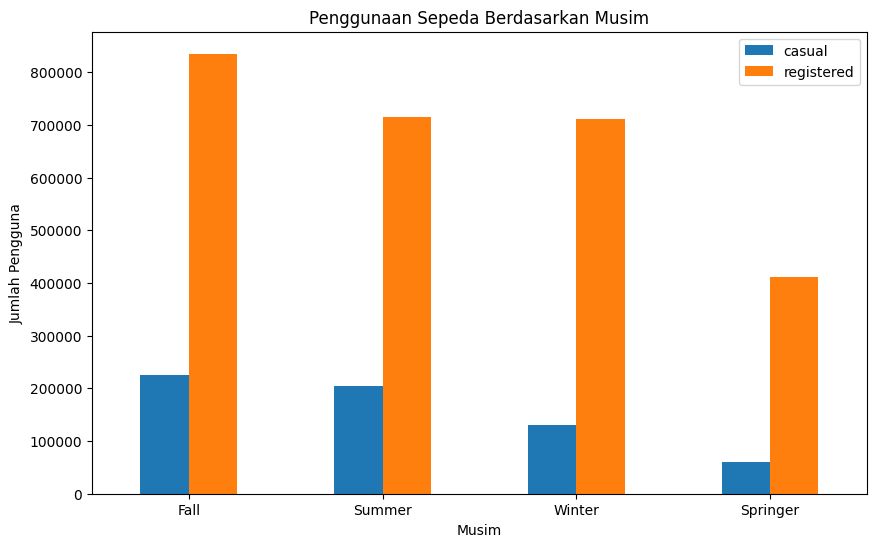

In [41]:
seasonal_usage.index = ['Fall', 'Summer', 'Winter', 'Springer']
seasonal_usage[['casual', 'registered']].plot(kind='bar', figsize=(10, 6))

plt.title('Penggunaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Pengguna')
plt.xticks(rotation=0)

plt.show()

**Insight :**
- Pada data bar chart diatas dapat dilihat bahwa pengguna casual cenderung lebih sering melakukan peminjaman pada musim Fall dan Summer dibandingkan dengan musim Winter serta Springer
- Sedangkan untuk pengguna registered cenderung lebih stabil dalam melakukan peminjaman sepeda pada musim apa saja dan lebih banyak melakukan peminjaman pada musim Fall

### Pertanyaan 4:
Apakah ada batasan kecepatan angin tertentu di mana peminjaman sepeda mulai berkurang drastis?

<ipython-input-39-fe1d03c22196>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="windspeed_y", y="cnt_y", data=cnt_max.head(5), palette=colors_max, ax=ax[0])
<ipython-input-39-fe1d03c22196>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="windspeed_y", y="cnt_y", data=cnt_min.head(5), palette=colors_min, ax=ax[1])


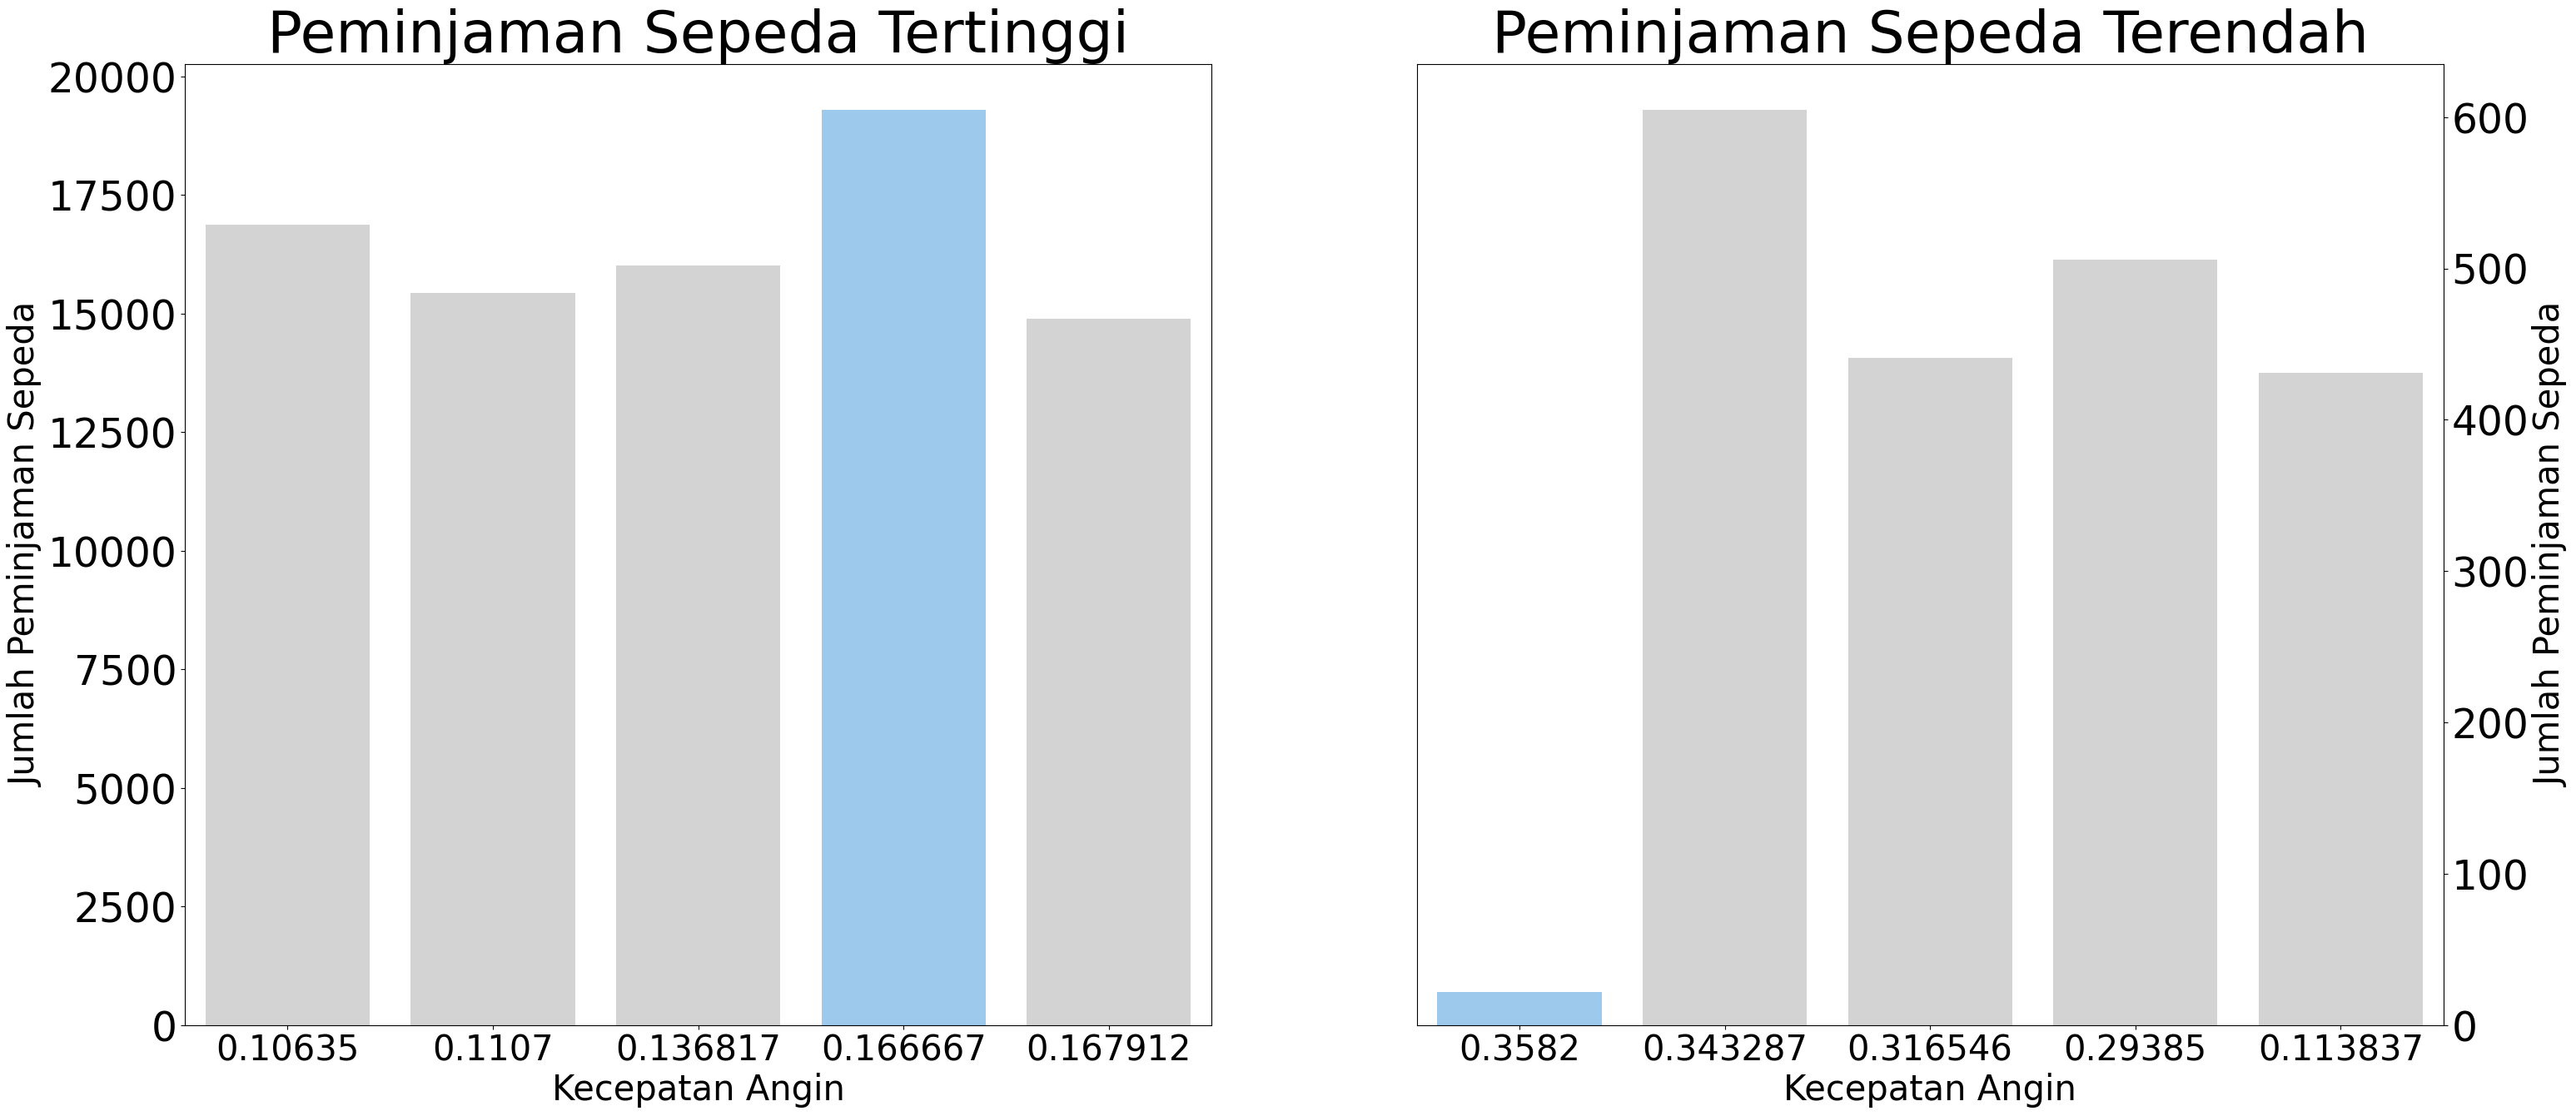

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(35,15))

colors_max = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#90CAF9", "#D3D3D3"]
colors_min = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#90CAF9"]

sns.barplot(x="windspeed_y", y="cnt_y", data=cnt_max.head(5), palette=colors_max, ax=ax[0])
ax[0].set_ylabel("Jumlah Peminjaman Sepeda", fontsize=30)
ax[0].set_xlabel("Kecepatan Angin", fontsize=30)
ax[0].set_title("Peminjaman Sepeda Tertinggi", loc="center", fontsize=50)
ax[0].tick_params(axis="y", labelsize=35)
ax[0].tick_params(axis="x", labelsize=30)

sns.barplot(x="windspeed_y", y="cnt_y", data=cnt_min.head(5), palette=colors_min, ax=ax[1])
ax[1].set_ylabel("Jumlah Peminjaman Sepeda", fontsize=30)
ax[1].set_xlabel("Kecepatan Angin", fontsize=30)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Peminjaman Sepeda Terendah", loc="center", fontsize=50)
ax[1].tick_params(axis='y', labelsize=35)
ax[1].tick_params(axis='x', labelsize=30)

**Insight :**
- Berdasarkan hasil visualisasi barchart diatas bisa dilihat bahwa peminjaman sepeda lebih banyak dilakukan dalam kecepatan angin yang standar tidak terlalu kuat
- Pada tabel visualisasi Terendah bisa dilihat bahwa peminjaman sepeda lebih cenderung sedikit ketika kecepatan angin sangat besar karena ini pun berbahaya untuk berkendara sepeda pada saat kecepatan angin sangat besar

In [48]:
all_df.to_csv("all_data.csv", index=False)

## Conclusion

- Conclution pertanyaan 1
Berdasarkan visualisasi line chart yang telah disajikan, dapat disimpulkan bahwa jumlah peminjaman sepeda cenderung meningkat pada pertengahan tahun, menunjukkan tren penggunaan yang lebih tinggi dibandingkan dengan awal atau akhir tahun.
- Conclution pertanyaan 2
Peminjaman sepeda lebih sering terjadi pada hari menuju akhir pekan seperti kamis, jumat dan sabtu data ini menunjukkan banyak pengguna melakukan peminjaman untuk bekerja ataupun untuk rekreasi semata, namun tren peminjaman menurun ketika hari minggu dimana pengguna lebih sering menggunakan kendaraan lain untuk berliburan
- Conclution pertanyaan 3
Pengguna Casual cenderung lebih banyak melakukan peminjaman sepeda pada musim tertentu seperti pada Fall atau Musim Gugur dan Summer atau Musim panas
Sedangkan untuk Pengguna Registered cenderung lebih konsisten melakukan peminjaman sepeda pada setiap musim bisa dikatakan Pengguna Registered lebih konsisten dibanding Pengguna Casual
- Conclution pertanyaan 4
Berdasarkan visualisasi data yang didapat kecepatan angin tinggi seperti (0.31) sampai dengan (0.35) dapat mempengaruhi pengguna untuk melakukan peminjaman sepeda, karena kecepatan angin tinggi dapat membahayakan pengguna dalam berkendara sepeda